In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

2023-11-05 22:11:31.936289: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-05 22:11:31.987407: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 22:11:31.987461: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 22:11:31.987502: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-05 22:11:31.995976: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-05 22:11:31.996576: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
df = pd.read_csv("data_post.csv")

In [3]:
df["Class"] = df["Class"].map( {
    2:1,
    4:0,
    
})

In [4]:
X = df[df.columns[:-1]].to_numpy()
X = X.reshape(X.shape[0],X.shape[1],1)
y = df.Class.to_numpy()


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=64, activation='relu', return_sequences=False, input_shape=(X.shape[1], X.shape[2])),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
epoch = 10
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)
record = model.fit(X,y,validation_split=0.33,epochs=epoch,verbose=2)

Epoch 1/10
15/15 - 2s - loss: 0.5281 - accuracy: 0.8269 - val_loss: 0.3770 - val_accuracy: 0.9740 - 2s/epoch - 112ms/step
Epoch 2/10
15/15 - 0s - loss: 0.2414 - accuracy: 0.9573 - val_loss: 0.1087 - val_accuracy: 0.9784 - 89ms/epoch - 6ms/step
Epoch 3/10
15/15 - 0s - loss: 0.1762 - accuracy: 0.9466 - val_loss: 0.0392 - val_accuracy: 0.9957 - 82ms/epoch - 5ms/step
Epoch 4/10
15/15 - 0s - loss: 0.1526 - accuracy: 0.9466 - val_loss: 0.0468 - val_accuracy: 0.9913 - 90ms/epoch - 6ms/step
Epoch 5/10
15/15 - 0s - loss: 0.1391 - accuracy: 0.9509 - val_loss: 0.0423 - val_accuracy: 0.9957 - 110ms/epoch - 7ms/step
Epoch 6/10
15/15 - 0s - loss: 0.1496 - accuracy: 0.9509 - val_loss: 0.0386 - val_accuracy: 0.9957 - 94ms/epoch - 6ms/step
Epoch 7/10
15/15 - 0s - loss: 0.1317 - accuracy: 0.9530 - val_loss: 0.1671 - val_accuracy: 0.9394 - 126ms/epoch - 8ms/step
Epoch 8/10
15/15 - 0s - loss: 0.1302 - accuracy: 0.9594 - val_loss: 0.0837 - val_accuracy: 0.9740 - 147ms/epoch - 10ms/step
Epoch 9/10
15/15 - 0

In [10]:
train_loss = record.history["loss"]
train_accuracy = record.history["accuracy"]
valid_loss = record.history["val_loss"]
valid_accuracy = record.history["val_accuracy"]

In [11]:
def plot_rcord(train,valid,title,label_x,label_y):
    epoch=len(train)
    
    plt.plot(range(1,epoch+1),train,label="Train",color='b')
    plt.plot(range(1,epoch+1),valid,label="Validation",color='r')
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.grid()
    plt.legend()
    plt.show()

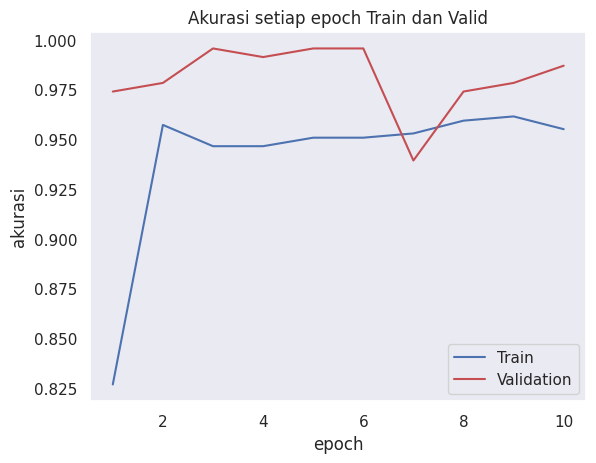

In [12]:
plot_rcord(train_accuracy,valid_accuracy,"Akurasi setiap epoch Train dan Valid","epoch","akurasi")

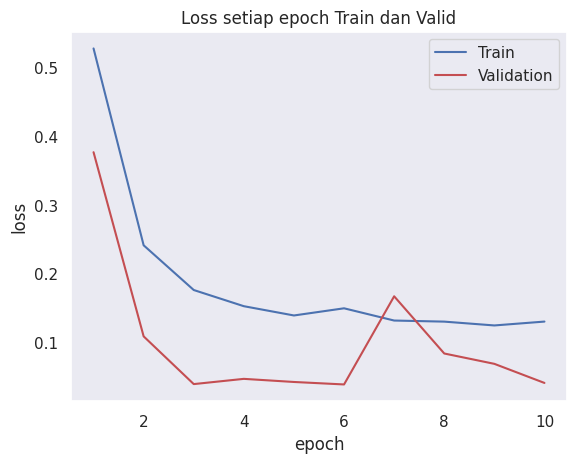

In [13]:
plot_rcord(train_loss,valid_loss,"Loss setiap epoch Train dan Valid","epoch","loss")

In [14]:
# cross validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True,random_state=22)

for index_train, index_test in skf.split(X,y):
    train_x, test_x = X[index_train],X[index_test]
    train_y, test_y = y[index_train], y[index_test]

    model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
    )

    model.fit(train_x,train_y,epochs=200,verbose=0)
    scores = model.evaluate(test_x,test_y, verbose=0)

    print("Validation accuracy: {:.2f}%".format(scores[1] * 100))


Validation accuracy: 97.86%
Validation accuracy: 98.57%
Validation accuracy: 99.29%
Validation accuracy: 100.00%
Validation accuracy: 100.00%
